In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("project1").getOrCreate()
df = spark.read.csv("dataset_R7.txt")
df.show()
df.printSchema()

+-----------+---+-----------+------+-------+--------------------+--------+--------------------+--------------+--------------+
|        _c0|_c1|        _c2|   _c3|    _c4|                 _c5|     _c6|                 _c7|           _c8|           _c9|
+-----------+---+-----------+------+-------+--------------------+--------+--------------------+--------------+--------------+
|row  number|age|work sector|salery|savings|Food expenses (mo...|zip code|other expenses (m...|educaion years|economic class|
|          1| 35|          C|  3884|   8084|                 823|   26248|                2319|            15|             2|
|          2| 47|          A|  5542|  44663|                 958|   19460|                1766|            15|             4|
|          3| 44|          A|  5249|  14991|                 938|   19606|                1503|            14|             4|
|          4| 35|          E|  7598|  24363|                2188|   29328|                1534|            15|        

In [3]:
#The dataset that we were asked to load is of type text, so without defining what the headers are, the separators between the data and the data type (int,string etc) we will not be able to analyze properly
#This can be done during the loading phase, but I wanted to illustrate and show that the file is not properly arranged
#Now let's load the dataset properly
df = spark.read.csv(path="dataset_R7.txt",sep=",",header=True,quote="",inferSchema=True)
df.show()
df.printSchema()

+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+
|row  number|age|work sector|salery|savings|Food expenses (month)|zip code|other expenses (month)|educaion years|economic class|
+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+
|          1| 35|          C|  3884|   8084|                  823|   26248|                  2319|            15|             2|
|          2| 47|          A|  5542|  44663|                  958|   19460|                  1766|            15|             4|
|          3| 44|          A|  5249|  14991|                  938|   19606|                  1503|            14|             4|
|          4| 35|          E|  7598|  24363|                 2188|   29328|                  1534|            15|             7|
|          5| 35|          C|  3290|    169|                  766|   26215|                  1512

In [5]:
#by using pandas the data is shown better and more "clear"
#I'll import sql function as well for analysis later
from pyspark.sql.functions import * 
import pandas as pd
pd.DataFrame(df.take(10) , columns = df.columns)

,row number,age,work sector,salery,savings,Food expenses (month),zip code,other expenses (month),educaion years,economic class
0,1,35,C,3884,8084,823,26248,2319,15,2
1,2,47,A,5542,44663,958,19460,1766,15,4
2,3,44,A,5249,14991,938,19606,1503,14,4
3,4,35,E,7598,24363,2188,29328,1534,15,7
4,5,35,C,3290,169,766,26215,1512,17,2
5,6,43,B,8047,12699,1266,22489,1307,23,7
6,7,38,A,5326,23045,752,19407,1559,15,4
7,8,40,E,8074,85556,1955,29063,1990,17,7
8,9,40,A,4849,32086,1338,12374,1426,17,4
9,10,42,D,1359,2728,463,28032,1683,13,0


In [7]:
#I noticed that "row number" Written with a double space on the keyboard and education spelled wrong
#This will hinder us later in writing the code, let's fix it
df=df.withColumnRenamed("row  number","row number") \
 .withColumnRenamed("educaion years","education years")
df.schema.names

['row number',
 'age',
 'work sector',
 'salery',
 'savings',
 'Food expenses (month)',
 'zip code',
 'other expenses (month)',
 'education years',
 'economic class']

In [9]:
#Basic information about the size of our dataset
print("The number of columns in our dataframe is:",len(df.columns))
print("The number of rows in our datatframe is:", df.count())

The number of columns in our dataframe is: 10
The number of rows in our datatframe is: 6000


In [11]:
#For the "work sector" and economic class columns I would use group by as well
df.summary().toPandas()

,summary,row number,age,work sector,salery,savings,Food expenses (month),zip code,other expenses (month),education years,economic class
0,count,5967,5988,5964,5988,5988,5988,5974,5988,5988,5947
1,mean,3014.200100553042,40.5253841015364,None,5174.702738810955,21025.202070808282,1035.2972611890448,24671.085035152326,1698.5923513694054,15.888443553774215,3.9821758870018495
2,stddev,1727.0603024058403,10.135256501713764,None,2176.6865667877546,18755.069989879717,442.02993769856295,4493.747485438335,334.03428308565617,2.99527717703765,2.224988450104464
3,min,1,6,A,320,5,225,12140,630,5,0
4,25%,1524,34,None,3338,6256,696,22643,1474,14,2
5,50%,3016,41,None,4943,16149,991,25717,1699,16,4
6,75%,4508,47,None,7249,28641,1261,28167,1920,18,6
7,max,6000,80,E,10529,118084,2802,29876,2991,26,10


In [13]:
#To see the age distribution I will use this query
if df.where(col("age").isNull()).count() > 0 :
            print("The number of different ages there is in the data is:", df.groupby("age").count().count() -1)
else: print("The number of different ages there is in the data is:", df.groupby("age").count().count())

The number of different ages there is in the data is: 70


In [15]:
df.groupby("work sector").count().orderBy("count",ascending = False).toPandas()
#we notice that The most common work sector is D

,work sector,count
0,D,1211
1,C,1208
2,B,1201
3,A,1181
4,E,1163
5,None,36


In [17]:
df.groupby("work sector").agg({'age':'avg', 'salery':'avg','savings':'avg','Food expenses (month)':'avg','other expenses (month)':'avg','education years':'avg','economic class':'avg'}).orderBy("avg(salery)",ascending = False).toPandas()
#In the current table we can see average data for each sector
#I chose specific columns because there are columns whose average data will not give me any useful information ("row number", "zip code")
#(We will use this later to fill in the NULL values)

,work sector,avg(savings),avg(Food expenses (month)),avg(other expenses (month)),avg(salery),avg(age),avg(economic class),avg(education years)
0,E,48364.613929,1696.355116,1695.171969,8004.862425,40.485813,6.826125,18.518487
1,B,20857.213156,1202.756037,1692.177352,6977.515404,39.826811,5.780856,17.627810
2,None,21381.833333,1260.458333,1665.333333,5776.833333,41.833333,4.500000,16.041667
3,A,24747.044877,993.497883,1688.592718,5011.270110,40.502964,3.836038,16.459780
4,C,7294.640728,804.123344,1701.370861,3506.473510,41.301325,2.307820,14.499172
5,D,4995.872007,501.268373,1715.878613,2480.342692,40.478117,1.273483,12.463254


In [19]:
df.groupby("economic class").count().orderBy("count",ascending = False).toPandas()
#We notice that The most common economic class is 2

,economic class,count
0,2.0,1121
1,3.0,827
2,4.0,812
3,7.0,794
4,6.0,755
5,1.0,621
6,5.0,540
7,8.0,264
8,0.0,192
9,NaN,53


In [21]:
df.groupby("economic class").agg({'age':'avg', 'salery':'avg','savings':'avg','Food expenses (month)':'avg','other expenses (month)':'avg','education years':'avg','economic class':'avg'}).orderBy("avg(salery)",ascending = False).toPandas()
#In the current table we can see average data for each economic class
#Again, I didn't select all the columns as some are not useful to me
#(we can clearly see the increase in salery as a function of economic class, we will use this later)

,economic class,avg(savings),avg(Food expenses (month)),avg(other expenses (month)),avg(salery),avg(age),avg(economic class),avg(education years)
0,10.0,39607.000000,1340.000000,1456.000000,10529.000000,48.000000,10.0,17.000000
1,9.0,48209.250000,1496.150000,1297.250000,9512.550000,41.700000,9.0,18.000000
2,8.0,46789.738636,1610.424242,1490.886364,8831.060606,39.674242,8.0,18.109848
3,7.0,41840.623426,1559.078086,1656.863980,8103.536524,40.377834,7.0,18.301008
4,6.0,31139.121854,1401.707285,1731.380132,7270.336424,40.586755,6.0,18.062252
5,5.0,23762.318519,1199.125926,1677.501852,6163.292593,40.079630,5.0,17.414815
6,NaN,20540.804878,1042.902439,1694.878049,5343.268293,40.829268,NaN,15.829268
7,4.0,23953.668719,1025.383005,1669.444581,5144.263547,40.150246,4.0,16.550493
8,3.0,13826.339782,863.597340,1659.134220,4127.442563,41.088271,3.0,15.148730
9,2.0,6855.893845,696.670830,1721.834077,3245.890277,40.710080,2.0,13.840321


In [23]:
#Now after we've got some basic knowledge about our dataset Let's analyze the rows and columns with NULL values more deeply
print("The number of rows with at least one NULL value is:", df.where(col("row number").isNull() | col("age").isNull() | col("work sector").isNull() | col("savings").isNull() | col("food expenses (month)").isNull() | col("zip code").isNull() | col("other expenses (month)").isNull() | col("education years").isNull() | col("economic class").isNull()).count()) 
print("The number of rows with all NULL values is:", df.where(col("row number").isNull() & col("age").isNull() & col("work sector").isNull() & col("savings").isNull() & col("food expenses (month)").isNull() & col("zip code").isNull() & col("other expenses (month)").isNull() & col("education years").isNull() & col("economic class").isNull()).count())
print("The number of rows without useful data (just row number data):" , df.where(col("row number").isNotNull() & col("age").isNull() & col("work sector").isNull() & col("savings").isNull() & col("food expenses (month)").isNull() & col("zip code").isNull() & col("other expenses (month)").isNull() & col("education years").isNull() & col("economic class").isNull()).count())
print("The number of rows with all useful information except the row number:" , df.where(col("row number").isNull() & col("age").isNotNull() & col("work sector").isNotNull() & col("savings").isNotNull() & col("food expenses (month)").isNotNull() & col("zip code").isNotNull() & col("other expenses (month)").isNotNull() & col("education years").isNotNull() & col("economic class").isNotNull()).count())
print("The number of NULL values in every column is:")
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

The number of rows with at least one NULL value is: 124
The number of rows with all NULL values is: 0
The number of rows without useful data (just row number data): 12
The number of rows with all useful information except the row number: 33
The number of NULL values in every column is:


,row number,age,work sector,salery,savings,Food expenses (month),zip code,other expenses (month),education years,economic class
0,33,12,36,12,12,12,26,12,12,53


In [9]:
#There are 12 rows with no values at all - I won't delete them but will build a separate dataset without them
#Moreover - in the new data et I will drop the "row number" column - it will be preserved for me in the old dataset so no data has been deleted
df1 = df.where(col("age").isNotNull() | col("work sector").isNotNull() | col("savings").isNotNull() | col("food expenses (month)").isNotNull() | col("zip code").isNotNull() | col("other expenses (month)").isNotNull() | col("education years").isNotNull() | col("economic class").isNotNull())
df1 = df1.drop("row number")
df1.count()

5988

In [27]:
#The current NULL values that needs to fill
df1.select([count(when(col(c).isNull(), c)).alias(c) for c in df1.columns]).toPandas()

,age,work sector,salery,savings,Food expenses (month),zip code,other expenses (month),education years,economic class
0,0,24,0,0,0,14,0,0,41


In [11]:
import pyspark.sql.functions as F

In [13]:
#In order to fill in the missing values in the "work sector" column, I will use the information I found in the groupby table about their average salaries
#same as in the "economic class" column
df1 = df1.withColumn('work sector', F.when((col("work sector").isNull()) & (col("salery") < 3000) , 'D').otherwise(col("work sector")))
df1 = df1.withColumn('work sector', F.when((col("work sector").isNull()) & (col("salery") > 3000) & (col("salery") < 4000) , 'C').otherwise(col("work sector")))
df1 = df1.withColumn('work sector', F.when((col("work sector").isNull()) & (col("salery") > 4000) & (col("salery") < 6000) , 'A').otherwise(col("work sector")))
df1 = df1.withColumn('work sector', F.when((col("work sector").isNull()) & (col("salery") > 6000) & (col("salery") < 7500) , 'B').otherwise(col("work sector")))
df1 = df1.withColumn('work sector', F.when((col("work sector").isNull()) & (col("salery") > 7500) , 'E').otherwise(col("work sector")))

In [15]:
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") < 2000) , 0).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 2000) & (col("salery") < 3000) , 1).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 3000) & (col("salery") < 4000) , 2).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 4000) & (col("salery") < 5000) , 3).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 5000) & (col("salery") < 6000) , 4).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 6000) & (col("salery") < 7000) , 5).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 7000) & (col("salery") < 8000) , 6).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 8000) & (col("salery") < 8500) , 7).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 8500) & (col("salery") < 9000) , 8).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 9000) & (col("salery") < 10000) , 9).otherwise(col("economic class")))
df1 = df1.withColumn('economic class', F.when((col("economic class").isNull()) & (col("salery") > 10000) , 10).otherwise(col("economic class")))


In [17]:
#The zip code NULLs I'll fill with the most common zip code whice is 28258
most_common_zip_code = df.filter(col("zip code").isNotNull()).groupBy("zip code").count().orderBy(desc("count")).first()["zip code"]
df1.groupBy("zip code").count().orderBy("count",ascending = False).toPandas()

,zip code,count
0,NaN,14
1,28259.0,10
2,28073.0,10
3,27990.0,10
4,28146.0,9
...,...,...
3809,12444.0,1
3810,26639.0,1
3811,26638.0,1
3812,29162.0,1


In [19]:
df1 = df1.withColumn("zip code", F.when((col("zip code").isNull()), most_common_zip_code).otherwise(col("zip code")))

In [21]:
#Now my dataset is finally full
df1.select([count(when( col(c).isNull(),c)).alias(c) for c in df1.columns]).toPandas()

,age,work sector,salery,savings,Food expenses (month),zip code,other expenses (month),education years,economic class
0,0,0,0,0,0,0,0,0,0


In [41]:
#Here I'll check duplicate rows in the dataframe
#We can see its equel to the original dataframe so there isnt duplicate rows
df1.distinct().count() == df1.count()

True

In [43]:
#From basic logic there is a possibility that there is an anomaly when the person's age is less than his years of education 
#let's check it and put these rows in a separate table and maybe in the future they will be corrected
anomalyrows= df1.where(col("age") < col("education years"))
df1.where(col("age") < col("education years")).count()

59

In [45]:
#Now it's finally time to run some complex queries to find useful information
#Let's say I'm a manager at an investment company, from analyzing my customer data I got this set of information

In [47]:
#1)In this query I find the twenty customers with the highest salaries and savings, they will be my most important customers
#I can see their age, where they live, how much they spend per month and what their level of education is
#It is interesting to see that almost everyone works in sector E
print("The Data of the 20 customers with the highest salary and savings is:")
df1.orderBy(floor(col("salery")/1000),"savings", ascending=False).show(20)

The Data of the 20 customers with the highest salary and savings is:
+---+-----------+------+-------+---------------------+--------+----------------------+---------------+--------------+
|age|work sector|salery|savings|Food expenses (month)|zip code|other expenses (month)|education years|economic class|
+---+-----------+------+-------+---------------------+--------+----------------------+---------------+--------------+
| 42|          E| 10007| 105908|                 2007|   29426|                  1945|             22|             9|
| 48|          B| 10529|  39607|                 1340|   22664|                  1456|             17|            10|
| 40|          E|  9324|  95920|                 1397|   28931|                  1676|             15|             8|
| 42|          E|  9193|  95892|                 1361|   28903|                  1849|             16|             8|
| 30|          E|  9073|  93049|                 1893|   29044|                  2059|             18|   

In [49]:
#2)In this query I present and count all the people who are "on the right track" - they are above average in terms of salary and below average in terms of their expenses
#This information can be useful for me, apparently these customers are accumulating savings in the bank and I will advise them to transfer the funds to me and invest in stocks
print("The number of people who are on the right track is:",df1.where((col("salery") > df1.select(avg("salery")).first()[0] ) &
      (col("Food expenses (month)") < df1.select(avg("Food expenses (month)")).first()[0] ) &
         (col("other expenses (month)") < df1.select(avg("other expenses (month)")).first()[0] ) ).count())
df1.where((col("salery") > df1.select(avg("salery")).first()[0] ) &
         (col("Food expenses (month)") < df1.select(avg("Food expenses (month)")).first()[0] ) &
         (col("other expenses (month)") < df1.select(avg("other expenses (month)")).first()[0] ) ).toPandas()

The number of people who are on the right track is: 159


,age,work sector,salery,savings,Food expenses (month),zip code,other expenses (month),education years,economic class
0,44,A,5249,14991,938,19606,1503,14,4
1,38,A,5326,23045,752,19407,1559,15,4
2,20,A,5238,31353,931,12218,1628,15,4
3,56,A,6184,35913,1026,13520,1400,18,5
4,34,A,5811,23641,873,17459,1569,16,5
...,...,...,...,...,...,...,...,...,...
154,48,B,8737,19913,1021,22844,1615,21,8
155,44,A,5658,22651,794,14853,1467,21,5
156,31,A,5710,28963,225,13061,1618,19,5
157,29,A,5310,34520,794,20823,1562,14,4


In [51]:
#we can see that although there are more people in classes 7 and 4 most of them are of economic status 5, and it can be said that they will probably increase their status soon
#In addition, as a manager in an investment company - when I find out that a new client is in economic class 5 - I will know that his probability of accumulating savings is higher.
df1.where((col("salery") > df1.select(avg("salery")).first()[0] ) &
        (col("Food expenses (month)") < df1.select(avg("Food expenses (month)")).first()[0] ) &
         (col("other expenses (month)") < df1.select(avg("other expenses (month)")).first()[0] ) ).groupby("economic class").count().orderBy(desc("count")).toPandas()

,economic class,count
0,5,73
1,4,49
2,6,16
3,7,12
4,8,8
5,9,1


In [53]:
#It is interesting to see that the vast majority of them work in sector A
df1.where((col("salery") > df1.select(avg("salery")).first()[0] ) &
        (col("Food expenses (month)") < df1.select(avg("Food expenses (month)")).first()[0] ) &
         (col("other expenses (month)") < df1.select(avg("other expenses (month)")).first()[0] ) ).groupby("work sector").count().orderBy(desc("count")).toPandas()

,work sector,count
0,A,116
1,B,31
2,E,12


In [55]:
#3)In this query I divided the ages into ranges - 0 represents people under 19, 1 represents people between the ages of 20 and 39 and so on.
#I can see the median savings of the age range by job sector. I can see in which sectors and in which age ranges the median is high and advertise to the exact target audience
df1.groupby( floor(col("age")/20) , "work sector" ).agg(median('savings')).orderBy("work sector","median(savings)",ascending = False).toPandas()

,FLOOR((age / 20)),work sector,median(savings)
0,0,E,56021.5
1,1,E,48638.5
2,3,E,48571.0
3,2,E,47329.0
4,0,D,4983.0
5,2,D,4869.5
6,3,D,4795.0
7,1,D,4733.0
8,4,C,8081.0
9,3,C,7455.0


In [57]:
#4)Many zip codes around the world are numbered so that the first numbers symbolize a certain area
#In this query we want to see where the people from the highest economic level live
#As a manager at the investment company, this will benefit me by knowing in which area I should put emphasis on advertising
print("The number of different areas is:",df1.groupby(floor(col("zip code")/1000)).count().count())
df1.filter(col("economic class")>6).groupby(floor(col("zip code")/1000),"economic class").count().orderBy("FLOOR((zip code / 1000))","count",ascending = False).toPandas()

The number of different areas is: 18


,FLOOR((zip code / 1000)),economic class,count
0,29,7,491
1,29,8,187
2,29,9,10
3,28,7,71
4,28,8,29
5,28,9,2
6,23,7,86
7,23,8,22
8,23,9,2
9,22,7,150


In [61]:
#5)We can see in this query that there is actually a close relationship between the ratio of income and expenses to the years of education
#I will prefer to set my advertising in academic centers
df2= df1.withColumn('salery and expenses ratio', col('salery') / ( col('other expenses (month)')+col("Food expenses (month)")))
df2.groupby("education years").avg("salery and expenses ratio").orderBy("avg(salery and expenses ratio)",ascending = False).toPandas()

,education years,avg(salery and expenses ratio)
0,26,2.649138
1,23,2.402136
2,22,2.385521
3,24,2.383658
4,21,2.362379
5,20,2.318324
6,19,2.255492
7,18,2.208486
8,17,2.094126
9,5,1.943255


In [23]:
#Before I start the correlations and predictions, I need to transfer the string type columns to int type, we will do this with the help of a function called "StringIndexer"
from pyspark.ml.feature import StringIndexer
work_sector_int =StringIndexer(inputCol= 'work sector',outputCol='work_sector_int')
work_sector_int = work_sector_int.fit(df1)
df1 = work_sector_int.transform(df1)
df1.show()

+---+-----------+------+-------+---------------------+--------+----------------------+---------------+--------------+---------------+
|age|work sector|salery|savings|Food expenses (month)|zip code|other expenses (month)|education years|economic class|work_sector_int|
+---+-----------+------+-------+---------------------+--------+----------------------+---------------+--------------+---------------+
| 35|          C|  3884|   8084|                  823|   26248|                  2319|             15|             2|            1.0|
| 47|          A|  5542|  44663|                  958|   19460|                  1766|             15|             4|            3.0|
| 44|          A|  5249|  14991|                  938|   19606|                  1503|             14|             4|            3.0|
| 35|          E|  7598|  24363|                 2188|   29328|                  1534|             15|             7|            4.0|
| 35|          C|  3290|    169|                  766|   26215

In [25]:
#Now you can download the "string" type column, I personally prefer to create another copy of the data set so that I have the data to check what each number actually means
df10=df1.drop("work sector")
df10.show()

+---+------+-------+---------------------+--------+----------------------+---------------+--------------+---------------+
|age|salery|savings|Food expenses (month)|zip code|other expenses (month)|education years|economic class|work_sector_int|
+---+------+-------+---------------------+--------+----------------------+---------------+--------------+---------------+
| 35|  3884|   8084|                  823|   26248|                  2319|             15|             2|            1.0|
| 47|  5542|  44663|                  958|   19460|                  1766|             15|             4|            3.0|
| 44|  5249|  14991|                  938|   19606|                  1503|             14|             4|            3.0|
| 35|  7598|  24363|                 2188|   29328|                  1534|             15|             7|            4.0|
| 35|  3290|    169|                  766|   26215|                  1512|             17|             2|            1.0|
| 43|  8047|  12699|    

In [27]:
#We will now create a vector that includes all the column names and insert a new column called "vector col" into the data set that includes the values of each row in an ordered vector
#Finally we will prepare a matrix using the Pearson method
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
CorrDF = df10.sample(False,1.0,46)
assembler = VectorAssembler(inputCols=CorrDF.columns,outputCol="full vector col")
df_for_corr = assembler.transform(df10).select("full vector col")
matrix = Correlation.corr(df_for_corr,"full vector col","pearson")

In [29]:
#We can see that the main diagonal consists entirely of the value 1 because the comparison is between the value and itself
#In addition, you can see that there are features that have a very weak correlation to others such as age (they are very close to 0), and there are features that have a strong correlation to other features such as economic status and salary
result = matrix.collect()[0]["pearson({})".format("full vector col")].values
reshape_matrix = pd.DataFrame(result.reshape(-1,len(CorrDF.columns)),columns = CorrDF.columns,index = CorrDF.columns)
print(reshape_matrix)

                             age    salery   savings  Food expenses (month)  \
age                     1.000000 -0.018985 -0.012479              -0.011714   
salery                 -0.018985  1.000000  0.729077               0.830714   
savings                -0.012479  0.729077  1.000000               0.709617   
Food expenses (month)  -0.011714  0.830714  0.709617               1.000000   
zip code                0.010916 -0.004380  0.066782               0.097292   
other expenses (month)  0.007158 -0.014156 -0.015008              -0.030905   
education years        -0.017089  0.671330  0.527428               0.626675   
economic class         -0.017722  0.980195  0.716914               0.818272   
work_sector_int        -0.010857  0.814977  0.780133               0.823167   

                        zip code  other expenses (month)  education years  \
age                     0.010916                0.007158        -0.017089   
salery                 -0.004380               -0.01415

C:\Users\manor\AppData\Local\Temp\ipykernel_3572\3412445601.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figr.show()


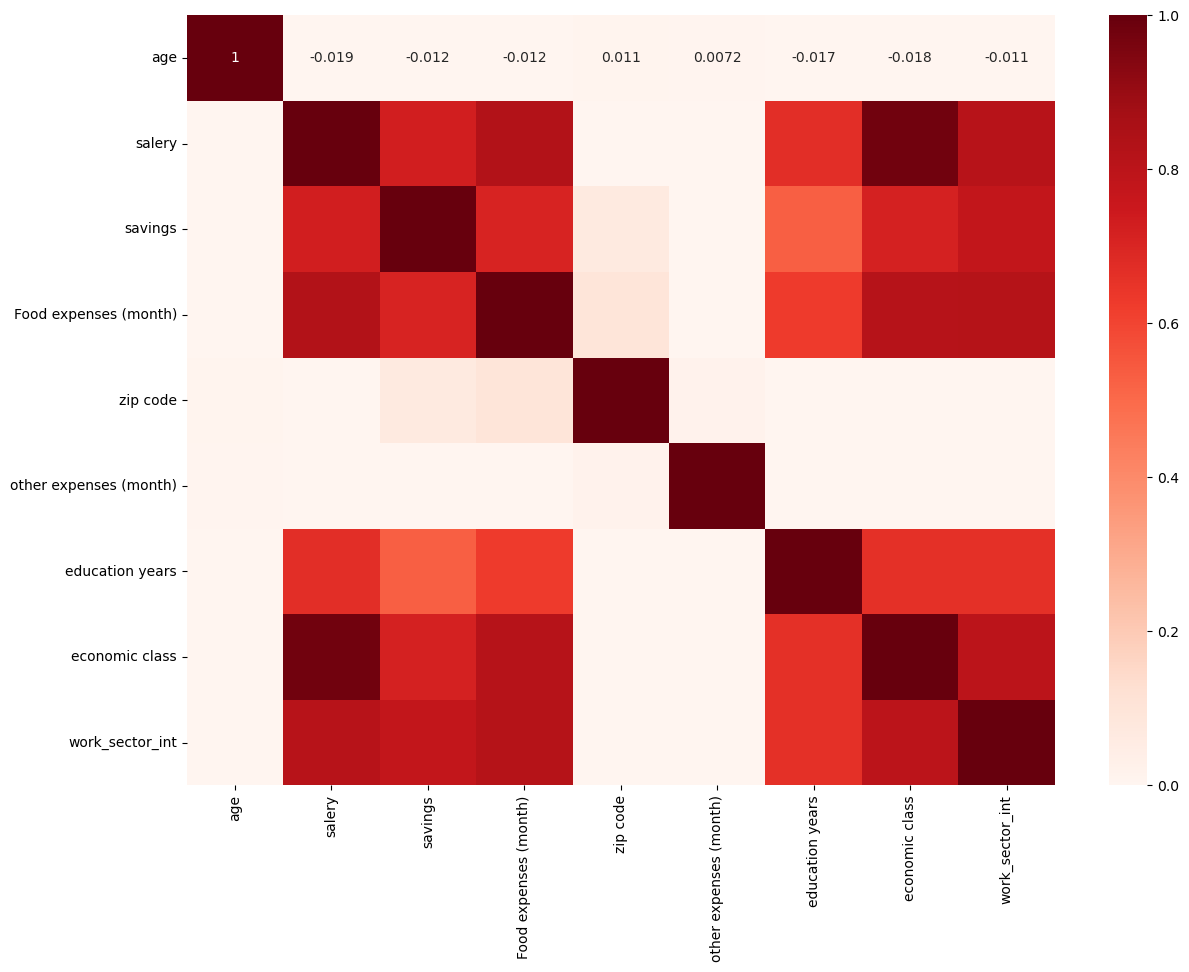

In [31]:
#We will run a heat map to see the data in a more visual and convenient way, where the color red is darker means there is a stronger correlation between the features
import seaborn as sns;
import matplotlib.pyplot as plt
ax = sns.heatmap(reshape_matrix,cmap="Reds",vmin=0,vmax=1,annot = True)
figr= plt.gcf()
figr.set_size_inches(14,10)
figr.show()

In [33]:
#Now I will create a new vector but this time without the value "work_sector_int" because this is the value for which I want to make a prediction
cols_without_work_sector = ["age","salery","savings","Food expenses (month)","zip code","other expenses (month)","education years","economic class"]

In [35]:
assembler2 = VectorAssembler(inputCols=cols_without_work_sector,outputCol="vector col without work sector")
df_for_pred = assembler2.transform(df10)
df_for_pred.show()

+---+------+-------+---------------------+--------+----------------------+---------------+--------------+---------------+------------------------------+
|age|salery|savings|Food expenses (month)|zip code|other expenses (month)|education years|economic class|work_sector_int|vector col without work sector|
+---+------+-------+---------------------+--------+----------------------+---------------+--------------+---------------+------------------------------+
| 35|  3884|   8084|                  823|   26248|                  2319|             15|             2|            1.0|          [35.0,3884.0,8084...|
| 47|  5542|  44663|                  958|   19460|                  1766|             15|             4|            3.0|          [47.0,5542.0,4466...|
| 44|  5249|  14991|                  938|   19606|                  1503|             14|             4|            3.0|          [44.0,5249.0,1499...|
| 35|  7598|  24363|                 2188|   29328|                  1534|        

In [37]:
#Here I actually choose what percentage of the data I want to send to "train" and how much I will leave for "test", he will actually grill me data according to the amount I told him.
#I will save this specific lottery by seed which is equal to 250524 (the date I made the prediction)
(train, test) = df_for_pred.randomSplit([0.9,0.1], seed =250524)
print("train #: " + str(train.count()),"test #: " + str(test.count()))

train #: 5340 test #: 648


In [40]:
#I want to use random forest as my prediction method
from pyspark.ml.classification import RandomForestClassifier
RF = RandomForestClassifier(featuresCol = 'vector col without work sector', labelCol = 'work_sector_int')
RFModel = RF.fit(train)
RF_predictions = RFModel.transform(test)

In [42]:
#I will present the result
RF_predictions.select(cols_without_work_sector).show(10)

+---+------+-------+---------------------+--------+----------------------+---------------+--------------+
|age|salery|savings|Food expenses (month)|zip code|other expenses (month)|education years|economic class|
+---+------+-------+---------------------+--------+----------------------+---------------+--------------+
| 17|  4474|  15808|                  904|   12348|                  1532|             17|             3|
| 18|  3192|   5157|                  619|   27023|                  1815|             16|             2|
| 18|  8127|  56106|                  892|   29846|                  2036|             19|             7|
| 19|  5638|  22178|                 1127|   17907|                  1930|             13|             4|
| 19|  6061|  30871|                 1377|   22967|                  1674|             17|             5|
| 19|  6255|  21469|                 1183|   23261|                  1791|             20|             5|
| 19|  8928|  73033|                 1803|   2

In [44]:
import pandas as pd
pd.DataFrame(RF_predictions.take(10), columns=RF_predictions.columns)

,age,salery,savings,Food expenses (month),zip code,other expenses (month),education years,economic class,work_sector_int,vector col without work sector,rawPrediction,probability,prediction
0,17,4474,15808,904,12348,1532,17,3,3.0,"[17.0, 4474.0, 15808.0, 904.0, 12348.0, 1532.0...","[0.02372032138665704, 1.7571549232002788, 0.47...","[0.0011860160693328515, 0.0878577461600139, 0....",3.0
1,18,3192,5157,619,27023,1815,16,2,1.0,"[18.0, 3192.0, 5157.0, 619.0, 27023.0, 1815.0,...","[0.03874193822260166, 19.846501658520555, 0.01...","[0.0019370969111300832, 0.9923250829260277, 0....",1.0
2,18,8127,56106,892,29846,2036,19,7,4.0,"[18.0, 8127.0, 56106.0, 892.0, 29846.0, 2036.0...","[0.0, 0.0, 1.5438618160229953, 0.1057525021857...","[0.0, 0.0, 0.07719309080114975, 0.005287625109...",4.0
3,19,5638,22178,1127,17907,1930,13,4,3.0,"[19.0, 5638.0, 22178.0, 1127.0, 17907.0, 1930....","[0.0, 0.02450987091521133, 4.349337355335148, ...","[0.0, 0.0012254935457605665, 0.217466867766757...",3.0
4,19,6061,30871,1377,22967,1674,17,5,2.0,"[19.0, 6061.0, 30871.0, 1377.0, 22967.0, 1674....","[0.0, 0.014625775586455735, 17.893724741280508...","[0.0, 0.0007312887793227869, 0.894686237064025...",2.0
5,19,6255,21469,1183,23261,1791,20,5,2.0,"[19.0, 6255.0, 21469.0, 1183.0, 23261.0, 1791....","[0.0, 0.014625775586455735, 18.436226680097473...","[0.0, 0.0007312887793227867, 0.921811334004873...",2.0
6,19,8928,73033,1803,28974,1511,19,8,4.0,"[19.0, 8928.0, 73033.0, 1803.0, 28974.0, 1511....","[0.0, 0.0, 0.06673571683430005, 0.004656267513...","[0.0, 0.0, 0.0033367858417150016, 0.0002328133...",4.0
7,20,5204,31993,1046,20067,1929,20,4,3.0,"[20.0, 5204.0, 31993.0, 1046.0, 20067.0, 1929....","[0.0, 0.076401595228664, 0.5239736721664026, 1...","[0.0, 0.003820079761433199, 0.0261986836083201...",3.0
8,20,7313,20845,1198,23055,1615,19,6,2.0,"[20.0, 7313.0, 20845.0, 1198.0, 23055.0, 1615....","[0.0, 0.014625775586455735, 18.860817616439743...","[0.0, 0.0007312887793227869, 0.943040880821987...",2.0
9,21,3474,5964,590,24294,2050,15,2,1.0,"[21.0, 3474.0, 5964.0, 590.0, 24294.0, 2050.0,...","[0.01258511658551597, 19.339347116368685, 0.33...","[0.0006292558292757983, 0.9669673558184341, 0....",1.0


In [46]:
#Here you can see the level of accuracy which is 99.5 percent prediction - (Overfiiting)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
AccuracyRF = MulticlassClassificationEvaluator(labelCol = 'work_sector_int', metricName = 'accuracy')
print(' RF Accuracy:', AccuracyRF.evaluate(RF_predictions))

 RF Accuracy: 0.9953703703703703


In [48]:
#Finally I will present a confusion matrix that will show me what his success rates are for each work sector
y_t = RF_predictions.select(['work_sector_int']).collect()
y_predictions = RF_predictions.select(['prediction']).collect()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t, y_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       122
         1.0       1.00      1.00      1.00       126
         2.0       0.99      0.99      0.99       134
         3.0       0.98      0.99      0.99       129
         4.0       1.00      1.00      1.00       137

    accuracy                           1.00       648
   macro avg       1.00      1.00      1.00       648
weighted avg       1.00      1.00      1.00       648



In [55]:
#The biggest meaning is that the organization can make a high-quality and successful prediction about the person's workplace based on their financial data - by doing so, it can improve the quality of the service it provides and its marketing and advertising that will be specific for each customer

In [53]:
#MANOR ASRAF,316278357